In [ ]:
## Conclusions 
# 1. Urban city types not surprisingly had the highest share of total rides, drivers and total fares. 
#
# 2. Rural city types had the highest average fare while urban city types had the lowest average fares.
# This could be because riders in rural areas traveled a longer average distance per ride 
# than riders in urban areas. Rural areas are more spread out. 
# 
# 3. Urban areas have significantly more available drivers which could be leading to more 
# competitive pricing than in rural and suburban areas. Urban areas have the lowest average fares. 
# The fact that urban areas have lower average fares could, however, simply be due to shorter 
# distances traveled on average per ride. 

In [56]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [74]:
# Read the city data
city_data = pd.read_csv(city_data_to_load)
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [75]:
# Read the ride data
ride_data = pd.read_csv(ride_data_to_load)
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [76]:
# Combine the data into a single dataset and display the data table 
combined_df = pd.merge(city_data, ride_data, how='outer', on='city')
combined_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [77]:
# Create key variables
# Find average fare by city 
avg_fare = combined_df.groupby("city")["fare"].mean()
avg_fare = pd.DataFrame(avg_fare).reset_index()
avg_fare = avg_fare.rename(columns = {'fare' : 'average fare'})
avg_fare.head()

,city,average fare
0,Amandaburgh,24.641667
1,Barajasview,25.332273
2,Barronchester,36.422500
3,Bethanyland,32.956111
4,Bradshawfurt,40.064000


In [78]:
# Find total number of rides per city 
rides_by_city = combined_df.groupby("city")["ride_id"].count()
rides_by_city = pd.DataFrame(rides_by_city).reset_index()
rides_by_city = rides_by_city.rename(columns = {'ride_id' : 'total rides'})
rides_by_city.head()

,city,total rides
0,Amandaburgh,18
1,Barajasview,22
2,Barronchester,16
3,Bethanyland,18
4,Bradshawfurt,10


In [79]:
# Find total number of drivers per city 
drivers_by_city = combined_df[["city" , "driver_count"]].drop_duplicates("city")
drivers_by_city = pd.DataFrame(drivers_by_city).reset_index()
drivers_by_city.head()

,index,city,driver_count
0,0,Richardfort,38
1,28,Williamsstad,59
2,51,Port Angela,67
3,70,Rodneyfort,34
4,93,West Robert,39


In [80]:
# Create variable for city type (Urban, Suburban, Rural)
city_type = combined_df[["city" , "type"]].drop_duplicates("city")
city_type = pd.DataFrame(city_type).reset_index()
city_type.head()

,index,city,type
0,0,Richardfort,Urban
1,28,Williamsstad,Urban
2,51,Port Angela,Urban
3,70,Rodneyfort,Urban
4,93,West Robert,Urban


In [81]:
# Combine variables into new DataFrame
rideshare_df = pd.merge(pd.merge(pd.merge(avg_fare, rides_by_city, on="city"), 
                             drivers_by_city, on="city"), city_type, on="city")
rideshare_df.head()

,city,average fare,total rides,index_x,driver_count,index_y,type
0,Amandaburgh,24.641667,18,1520,12,1520,Urban
1,Barajasview,25.332273,22,234,26,234,Urban
2,Barronchester,36.422500,16,2038,11,2038,Suburban
3,Bethanyland,32.956111,18,1996,22,1996,Suburban
4,Bradshawfurt,40.064000,10,2344,7,2344,Rural


## Bubble Plot of Ride Sharing Data

In [82]:
# Obtain the x and y coordinates for each of the three city types
urban_type = rideshare_df.loc[rideshare_df['type'] == 'Urban']
suburban_type = rideshare_df.loc[rideshare_df['type'] == 'Suburban']
rural_type = rideshare_df.loc[rideshare_df['type'] == 'Rural']

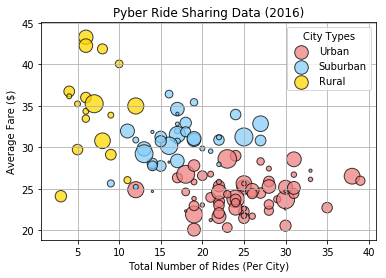

In [66]:
# Build the scatter plots for total fares by city type
# Create a legend
# Incorporate a text label regarding circle size

urban_axis = urban_type.plot(kind='scatter',x='total rides', y='average fare',
                       color='lightcoral', s=rideshare_df['driver_count']*5, label = 'Urban', 
                       alpha = 0.75, edgecolor = "black", linewidths = 1)    
suburban_axis = suburban_type.plot(kind='scatter', x='total rides', y='average fare', 
                          color='lightskyblue',s=rideshare_df['driver_count']*5, label = 'Suburban', 
                          alpha = 0.75, edgecolor = "black", linewidths = 1, ax=urban_axis)    
rural_axis = rural_type.plot(kind='scatter', x='total rides', y='average fare', 
                       color='gold', s=rideshare_df['driver_count']*5, label = 'Rural', 
                       alpha = 0.75, edgecolor = "black", linewidths = 1, ax=urban_axis)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend(title = 'City Types')
plt.grid(True)
plt.savefig("../Images/pyber_bubble_plot.png")
plt.show()

## Total Drivers by City Type

In [67]:
# Get a count of drivers by city type 
drivers_by_type = city_data.groupby('type').sum()
drivers_by_type['city'] = ['Rural','Suburban','Urban']
drivers_by_type

,driver_count,city
type,,
Rural,78,Rural
Suburban,490,Suburban
Urban,2405,Urban


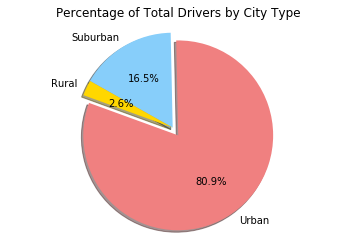

In [68]:
# Calculate percentage of drivers by city type 
types = city_data['type'].unique()
driver_count = [2405,490,78]
colors = ["lightcoral", "lightskyblue","gold"]
explode = (0.1,0,0)

# Build pie chart 
plt.pie(driver_count, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal")
plt.title("Percentage of Total Drivers by City Type")
plt.savefig("../Images/drivers_by_type.png")
plt.show()

## Total Fares by City Type

In [69]:
# Calculate percentage of total rides by city type 
rides_by_type = combined_df[['type' , 'fare']].groupby('type').sum()
rides_by_type['city'] = ['Rural', 'Suburban', 'Urban']
rides_by_type

,fare,city
type,,
Rural,4327.93,Rural
Suburban,19356.33,Suburban
Urban,39854.38,Urban


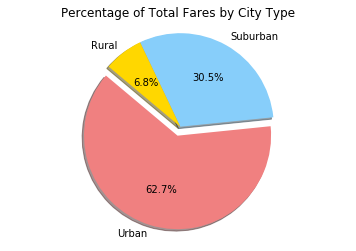

In [70]:
# Calculate percentage of fares by city type 
fares = combined_df['type'].unique()
fares_count = [39854.38, 19356.33, 4328.93]
colors = ["lightcoral", "lightskyblue","gold"]
explode = (0.1,0,0)

# Build pie chart 
plt.pie(fares_count, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Percentage of Total Fares by City Type")
plt.savefig("../Images/fares_by_type.png")
plt.show()

## Total Rides by City Type

In [71]:
# Calculate total rides by city types 
rides_by_type = combined_df[['city', 'type', 'ride_id']].groupby(['city', 'type']).count()
rides_by_type = rides_by_type.groupby('type').sum()
rides_by_type

,ride_id
type,
Rural,125
Suburban,625
Urban,1625


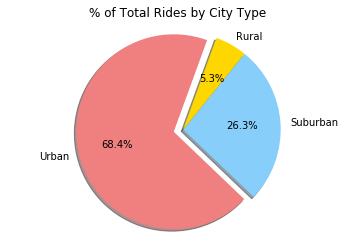

In [73]:
# Build pie chart 
types = ['Urban', 'Suburban','Rural']
rides = [1625, 625, 125]
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.1,0,0)

plt.pie(rides, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=70)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.savefig("../Images/rides_by_type.png")
plt.show()